# Statistics on Animal Bites

#### *Animal bites is a common problem around the US with high rate of incidents. A little insight into the statistics of aminal bites patterns may help people to identify potential danger and better protect themselves from those bites. *

## Dataset

[`The dataset`](https://www.kaggle.com/rtatman/animal-bites) is obtained from Kaggle, uploaded by Rachael Tatman.
This dataset recorded over 9,000 animal bites occurred near Louisville, Kentucky from 1985 to 2017. The dataset includes information on animal species, breed, gender, color, and rabies test.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Health_AnimalBites.csv")
data.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


## Animals that bite

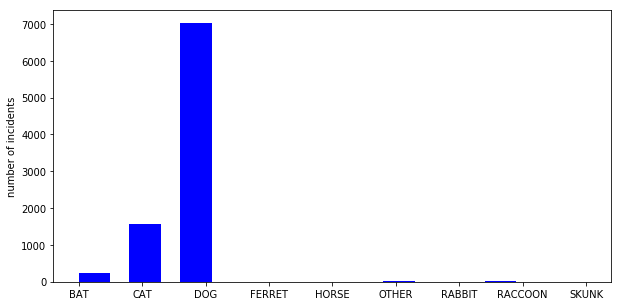

In [103]:
spec = data.SpeciesIDDesc
spec = spec.dropna()
plt.figure(figsize=(10,5))
plt.hist(spec, fc='b', width=0.5)
plt.ylabel('number of incidents')
plt.show()

Suprisingly, most people are bitten by dogs and cats, followed by bats.

## TOP 10 dog breeds you would want to avoid

In [113]:
breed = data.BreedIDDesc[data.SpeciesIDDesc == "DOG"]
breed = breed.dropna()
breed_con = breed.value_counts()
breed_con.to_frame(name='number of incidents').head(10)

,number of incidents
PIT BULL,1101
GERM SHEPHERD,327
LABRADOR RETRIV,253
BOXER,181
CHICHAUHUA,165
SHIH TZU,119
BEAGLE,115
ROTTWEILER,86
AAUST. TERR.,78
DACHSHUND,67


Certain breeds of dogs are a lot more ferocious than others. Be aware of those dogs next time.

## Female VS Male

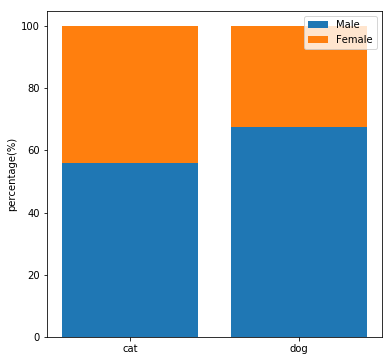

In [149]:
animal = np.array(('dog', 'cat'))
dog_s = data.GenderIDDesc[data.SpeciesIDDesc == "DOG"]
cat_s = data.GenderIDDesc[data.SpeciesIDDesc == "CAT"]
dog_s = dog_s.value_counts() #count number by gender
cat_s = cat_s.value_counts()
male = np.array((dog_s[0]/(dog_s[0]+dog_s[1]),cat_s[0]/(cat_s[0]+cat_s[1]))) #put percentage in new arrays
female = np.array((dog_s[1]/(dog_s[0]+dog_s[1]),cat_s[1]/(cat_s[0]+cat_s[1])))
#male = male * 100 / male.sum() #calculate percentage
#female = female * 100 / female.sum()
plt.figure(figsize=(6,6))
plt.bar(animal, male*100, label='Male')
plt.bar(animal, female*100, bottom=male*100, label='Female')
plt.legend()
plt.ylabel('percentage(%)')
plt.show()

Male dogs and cats are more aggressive than females. 